In [8]:
#matthew berning, 2021

import os
import sys
import time

sys.path.insert(0, os.path.abspath(os.path.dirname('../model/')))
sys.path.insert(0, os.path.abspath(os.path.dirname('../data/')))
sys.path.insert(0, os.path.abspath(os.path.dirname('../utils/')))

from model import Model
from dataset import WheatAwnDataset
import inspection_functions
import tensor_operations
import input_validation

import PIL
import GPUtil
import pickle
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image as ImDisp
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import confusion_matrix
from datetime import datetime
from tqdm import tqdm

import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms

%matplotlib inline

In [9]:
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  0% | 91% |
|  1 |  0% |  0% |
|  2 |  0% |  0% |
|  3 |  0% |  0% |


In [10]:
deviceIDs = GPUtil.getAvailable(order = 'first', limit = 1, maxLoad = 0.3, maxMemory = 0.3, includeNan=False, excludeID=[], excludeUUID=[])

print("most available GPU: ",deviceIDs[0])

most available GPU:  1


In [11]:
#assignment
os.environ["CUDA_VISIBLE_DEVICES"] = str(deviceIDs[0])

In [21]:
saved_model = Model('vgg16').construct_model(verbose=True)
saved_model.load_state_dict(torch.load('/pless_nfs/home/matthewrberning/wheat-awn-classification-multiyear/runs/2021-11-15-23_14_01_model_epoch-6_val-acc-88.676.pth'))

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<All keys matched successfully>

In [22]:
saved_model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
saved_model = saved_model.to(device)
print("device: ",device)

In [ ]:
data_csv = '/pless_nfs/home/matthewrberning/wheat-awn-classification-multiyear/data/2019_val_awns_oversampled.csv'

In [ ]:
sys.path.insert(0, os.path.abspath(os.path.dirname('/pless_nfs/home/matthewrberning/wheat-awn-classification-multiyear/model/dataset.py')))

In [ ]:
from dataset import WheatAwnDataset
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np

In [ ]:
#path to images
dataset_path = '/pless_nfs/home/matthewrberning/multi-year-cult-class/data/preprocessed/'

#compose transforms
transforms_ = transforms.Compose([transforms.RandomCrop((224,224)),
                                      transforms.ToTensor()])

#create the dataset
data = WheatAwnDataset(csv_filepath=data_csv, dataset_dir=dataset_path, transform=transforms_)

#create the dataloader
dataloader = DataLoader(data, batch_size=1, shuffle=True)

In [2]:

# import cv2
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
 
mod = nn.Sequential(*list(vgg16.children())[:-1])
print(mod)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__() 
        #img = images
        self.fc=nn.Linear(512,2)

    
    def forward(self,x):     
        x=x.view(512,7*7).mean(1).view(1,-1)
        x=self.fc(x)
        return  F.softmax(x,dim=1)

In [7]:
model=nn.Sequential(mod,Net())

In [8]:
print(model)

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

In [11]:
trainable_parameters = []
for name, p in model.named_parameters():
    if "fc" in name:
        trainable_parameters.append(p)
optimizer = torch.optim.SGD(params=trainable_parameters, lr=0.1, momentum=1e-5)  
criterion = nn.CrossEntropyLoss()

trainable_parameters

[Parameter containing:
 tensor([[-0.0328,  0.0369, -0.0113,  ..., -0.0035, -0.0055,  0.0205],
         [ 0.0095,  0.0140,  0.0183,  ...,  0.0432, -0.0188, -0.0375]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0105, 0.0289], requires_grad=True)]

In [14]:

params = list(Net().parameters())
weight = np.squeeze(params[-1].data.numpy())

weight

array([-0.01592763, -0.00082537], dtype=float32)

In [15]:
def return_CAM(feature_conv, weight, class_idx):
    # generate the class -activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        beforeDot =  feature_conv.reshape((nc, h*w))
        cam = np.matmul(weight[idx], beforeDot)
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam

In [30]:
from shutil import copy
import os
import random

#copy a selection of files to work with to a placeholder dir
placeholder_dir = "/pless_nfs/home/matthewrberning/wheat-awn-classification-multiyear/notebooks/cam_imagefolder/"
dataset_dir = "/pless_nfs/home/matthewrberning/multi-year-cult-class/data/preprocessed"

In [12]:
#collect filenames of images in dataset
img_filenames = os.listdir(dataset_dir)

In [32]:
#choose 10 at random
#use shutil.copy() to add files to the placeholder dir
#https://docs.python.org/3/library/shutil.html#shutil.copy

for i in range(10):
    print(img_filenames[random.randint(0,len(img_filenames))])
    copy(os.path.abspath(os.path.join(dataset_dir,img_filenames[random.randint(0,len(img_filenames))])), placeholder_dir)
    

20200603_20ASH_AM_X5R_5m_-90_video_flight1_DJI_A06276_C016_20200603_000509_1264_0824_1775_1336_20ASH00375.jpg
20190508_19RF_AM_X5R_5m_-60_video_Flight1_DJI_A06276_C012_20190508_000518_0240_0824_0751_1336_19RKY00430.jpg
20190515_19RF_AM_X5R_5m_-60_video_Flight1_DJI_A06276_C005_20190515_000854_1264_0824_1775_1336_19RKY00621.jpg
20200515_20ASH_AM_X5R_5m_-60_video_flight2_DJI_A06276_C003_20200515_000817_1776_0824_2287_1336_20ASH00055.jpg
20190523_19RF_AM_X5R_5m_-60_video_Flight1_DJI_A00417_C012_20190523_000501_2288_0824_2799_1336_19RKY00431.jpg
20200513_20ASH_AM_X5R_5m_-60_video_flight2_DJI_A06276_C016_20200513_000583_2800_0824_3311_1336_20ASH00380.jpg
20200609_20ASH_AM_X5R_5m_-60_video_flight1_DJI_A06074_C003_20200609_000259_0240_0824_0751_1336_20ASH00033.jpg
20190522_19RF_AM_X5R_5m_-60_video_Flight1_DJI_A00417_C004_20190522_000442_2800_0824_3311_1336_19RKY00637.jpg
20190506_19RF_AM_X5R_5m_-60_video_Flight1_DJI_A06276_C014_20190506_000419_0752_0824_1263_1336_19RKY00379.jpg
20190610_19RF_A

In [34]:

import torch
import torch.nn as nn
from torch.utils import data
from torchvision.models import vgg19
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

# use the ImageNet transformation
transform = transforms.Compose([transforms.Resize((224, 224)), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# define a 1 image dataset
dataset = datasets.ImageFolder(root="/pless_nfs/home/matthewrberning/wheat-awn-classification-multiyear/notebooks/", transform=transform)

# define the dataloader to load that single image
dataloader = data.DataLoader(dataset=dataset, shuffle=False, batch_size=1)

In [39]:
dataiter = iter(dataloader)

In [40]:
for i in range(10):
    print(dataiter.next())

[tensor([[[[-1.2445, -1.1418, -1.1932,  ..., -0.4054, -0.6965, -0.7308],
          [-1.2445, -1.2617, -1.2617,  ..., -0.4226, -0.7308, -0.6794],
          [-1.2103, -1.1932, -1.1247,  ..., -0.3369, -0.7993, -0.8335],
          ...,
          [-1.6042, -1.6042, -1.6727,  ..., -1.1418, -1.2103, -1.3473],
          [-1.0048, -1.0733, -1.1932,  ..., -1.0733, -1.1075, -1.2274],
          [-0.6109, -0.6965, -0.7822,  ..., -1.1760, -1.1760, -1.1418]],

         [[-0.8627, -0.7577, -0.8102,  ..., -0.0224, -0.3200, -0.3550],
          [-0.8627, -0.8803, -0.8978,  ..., -0.0399, -0.3550, -0.3025],
          [-0.8627, -0.8277, -0.7577,  ...,  0.0476, -0.4251, -0.4601],
          ...,
          [-1.2829, -1.2829, -1.3529,  ..., -0.8452, -0.9153, -1.0553],
          [-0.6527, -0.7052, -0.8277,  ..., -0.7752, -0.8277, -0.9328],
          [-0.2150, -0.3025, -0.3725,  ..., -0.8978, -0.8978, -0.8627]],

         [[-1.2641, -1.1596, -1.2119,  ..., -0.5147, -0.7936, -0.8110],
          [-1.2467, -1.2641, 

In [41]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        
        # get the pretrained VGG19 network
        self.vgg = vgg19(pretrained=True)
        
        # disect the network to access its last convolutional layer
        self.features_conv = self.vgg.features[:36]
        
        # get the max pool of the features stem
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        
        # get the classifier of the vgg19
        self.classifier = self.vgg.classifier
        
        # placeholder for the gradients
        self.gradients = None
    
    # hook for the gradients of the activations
    def activations_hook(self, grad):
        self.gradients = grad
        
    def forward(self, x):
        x = self.features_conv(x)
        
        # register the hook
        h = x.register_hook(self.activations_hook)
        
        # apply the remaining pooling
        x = self.max_pool(x)
        x = x.view((1, -1))
        x = self.classifier(x)
        return x
    
    # method for the gradient extraction
    def get_activations_gradient(self):
        return self.gradients
    
    # method for the activation exctraction
    def get_activations(self, x):
        return self.features_conv(x)

In [42]:
# initialize the VGG model
vgg = VGG()

# set the evaluation mode
vgg.eval()

# get the image from the dataloader
img, _ = next(iter(dataloader))

# get the most likely prediction of the model
pred = vgg(img).argmax(dim=1)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /pless_nfs/home/matthewrberning/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [57]:
pred = vgg(img)

In [58]:
pred

tensor([[ 1.1972e+00, -1.1586e-01, -3.3430e-01,  8.3027e-01,  1.9472e-01,
         -1.0431e+00, -1.3308e+00,  1.4678e+00, -6.4501e-01, -2.1935e+00,
         -6.2741e-02,  1.1923e+00,  1.1304e+00, -2.0716e-01,  9.5470e-01,
         -5.4457e-01,  2.0863e+00,  2.0101e+00,  1.4575e+00,  5.5919e-01,
         -1.4656e+00,  8.3503e-01,  1.0462e-01,  9.7708e-01,  5.8034e-01,
         -1.4917e-01,  1.0391e+00, -1.2673e+00,  7.2784e-01,  2.6788e+00,
          1.0186e+00,  2.3542e+00,  1.1120e+00, -1.5194e+00, -1.2097e+00,
         -9.5871e-01, -6.8034e-01, -4.6386e-01,  1.1795e+00,  3.0178e+00,
          3.2290e+00,  1.0262e+00, -1.3417e-01,  5.8188e-01,  6.6128e-01,
          8.4606e-01,  4.4683e+00,  5.4759e+00,  8.3203e-01, -9.5814e-01,
          1.2189e-01,  2.1737e+00,  1.1368e+00,  3.3673e-01,  8.5146e-01,
          5.5804e+00,  1.8883e+00,  1.1050e+00,  2.2488e+00,  5.7197e+00,
          1.8284e+00,  3.2669e+00,  1.5457e+00,  1.8540e-01,  5.3778e+00,
          3.4215e+00,  1.3798e+00, -1.

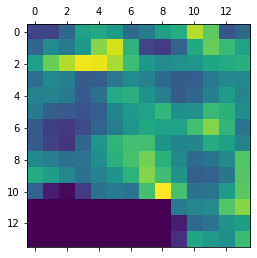

In [59]:
# get the gradient of the output with respect to the parameters of the model
pred[:, 998].backward() #this one is for the ImageNet class called 'ear, spike, capitulum'
# pred[:, 386].backward() #this one is for elephants

# pull the gradients out of the model
gradients = vgg.get_activations_gradient()

# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

# get the activations of the last convolutional layer
activations = vgg.get_activations(img).detach()

# weight the channels by corresponding gradients
for i in range(512):
    activations[:, i, :, :] *= pooled_gradients[i]
    
# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
# expression (2) in https://arxiv.org/pdf/1610.02391.pdf
heatmap = np.maximum(heatmap, 0)

# normalize the heatmap
heatmap /= torch.max(heatmap)

# draw the heatmap
plt.matshow(heatmap.squeeze())

In [ ]:
import cv2
img = cv2.imread('./data/Elephant/data/05fig34.jpg')
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('./map.jpg', superimposed_img)